<a href="https://colab.research.google.com/github/moises-rb/Analise_Dados/blob/main/Green_Belt/DistribuicaoEstatistica/Distribuicao_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste Notebook, vamos explorar a leitura de arquivos no formato XLSX, que fazem parte da minha certificação Green Belt. O objetivo deste exercício é como identificar uma Distribuição Estatística.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [3]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/DistribuicaoEstatistica/base_dados/Green_Belt_FM2S_Demo_3.xlsx?raw=True'
dados = pd.read_excel(url)
dados.head()

,Data,Quantidade produzida (kg),Estágio
0,1990-02-01,237.743019,A
1,1990-02-02,254.922399,A
2,1990-02-03,246.850588,A
3,1990-02-04,257.094066,A
4,1990-02-05,226.468559,A


In [5]:
# Aqui o Pandas "prepara" o arquivo para ver as abas
excel_file = pd.ExcelFile(url)
nomes_das_abas = excel_file.sheet_names
print(nomes_das_abas)

['Normalidade - Var. Contínuas 1', 'Normalidade - Var. Contínuas 2']


In [6]:
# Lendo a primeira aba da planilha
dados_aba1 = pd.read_excel(url, sheet_name=nomes_das_abas[0]) # podemos ler assim também: dados_aba1 = pd.read_excel(url, sheet_name='Normalidade - Var. Contínuas 1')
dados_aba1.head()

,Data,Quantidade produzida (kg),Estágio
0,1990-02-01,237.743019,A
1,1990-02-02,254.922399,A
2,1990-02-03,246.850588,A
3,1990-02-04,257.094066,A
4,1990-02-05,226.468559,A


In [7]:
# Lendo a segunda aba da planilha
dados_aba2 = pd.read_excel(url, sheet_name=nomes_das_abas[1]) # podemos ler assim também: dados_aba1 = pd.read_excel(url, sheet_name='Normalidade - Var. Contínuas 2')
dados_aba2.head()

,Ciclo,Tempo de Ciclo
0,1,3.805333
1,2,2.619274
2,3,3.834589
3,4,4.178187
4,5,4.576932


In [9]:
# Ver os nomes das colunas da sua primeira aba
print(dados_aba1.columns)

Index(['Data', 'Quantidade produzida (kg)', 'Estágio'], dtype='object')


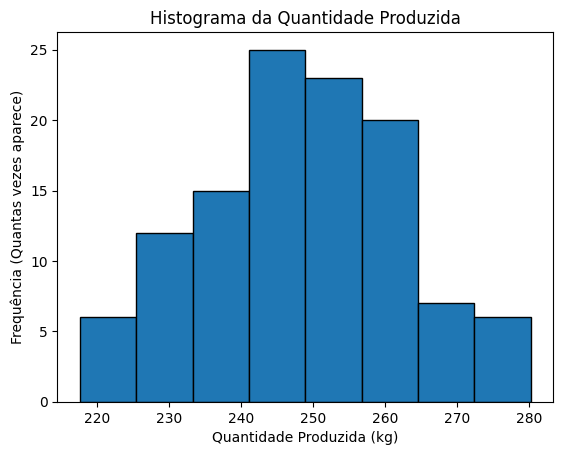

In [14]:
plt.hist(dados_aba1['Quantidade produzida (kg)'], bins=8, edgecolor='black')
plt.title('Histograma da Quantidade Produzida')
plt.xlabel('Quantidade Produzida (kg)')
plt.ylabel('Frequência (Quantas vezes aparece)')
plt.show()

In [16]:
# Ver os nomes das colunas da sua primeira aba
print(dados_aba2.columns)

Index(['Ciclo', 'Tempo de Ciclo'], dtype='object')


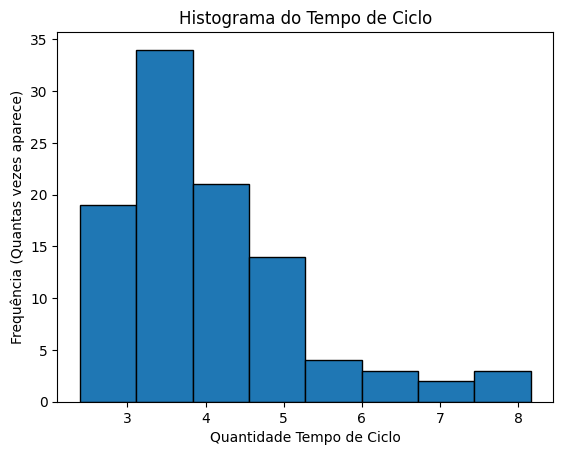

In [17]:
plt.hist(dados_aba2['Tempo de Ciclo'], bins=8, edgecolor='black')
plt.title('Histograma do Tempo de Ciclo')
plt.xlabel('Quantidade Tempo de Ciclo')
plt.ylabel('Frequência (Quantas vezes aparece)')
plt.show()

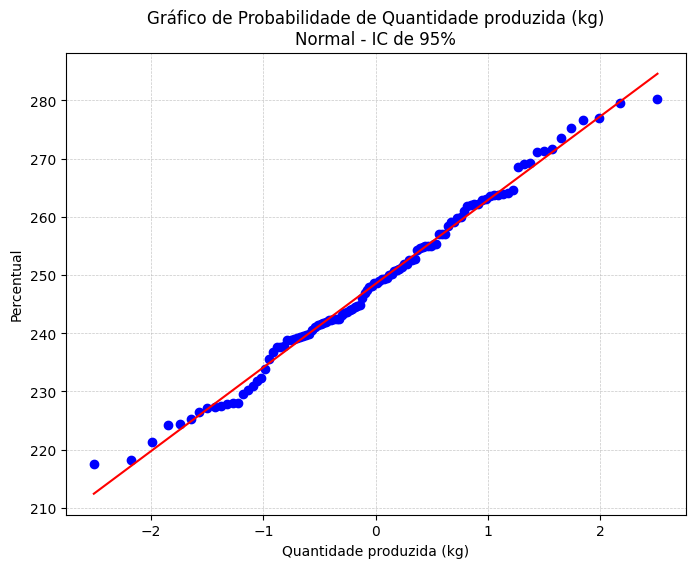

In [19]:
# Pegando os dados da coluna que queremos analisar
dados_para_analisar = dados_aba1['Quantidade produzida (kg)'].dropna() # O .dropna() tira qualquer "buraco" nos dados, se houver

# Gerando o gráfico de probabilidade
fig, ax = plt.subplots(figsize=(8, 6)) # Cria um "desenho" e um "local" para ele

stats.probplot(dados_para_analisar, dist="norm", plot=ax) # Essa é a mágica que faz o gráfico!

# Adicionando um título para nosso desenho
ax.set_title('Gráfico de Probabilidade de Quantidade produzida (kg)\nNormal - IC de 95%')
ax.set_xlabel('Quantidade produzida (kg)') # Rótulo da parte de baixo
ax.set_ylabel('Percentual') # Rótulo da lateral

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7) # Coloca umas grades para ajudar a ver
plt.show() # Mostra o desenho!

In [21]:
# Pegando os dados da coluna 'Quantidade produzida (kg)'
dados_quantidade = dados_aba1['Quantidade produzida (kg)'].dropna() # Para garantir que não tem buracos

# Pedindo o relatório rápido!
relatorio_quantidade = dados_quantidade.describe()

# Mostrando o relatório
print("--- Relatório Rápido para 'Quantidade produzida (kg)' ---")
print(relatorio_quantidade)

--- Relatório Rápido para 'Quantidade produzida (kg)' ---
count    114.000000
mean     248.499852
std       14.230959
min      217.565552
25%      239.431949
50%      248.590535
75%      258.933083
max      280.211021
Name: Quantidade produzida (kg), dtype: float64


In [22]:
# Realizando o Teste de Shapiro-Wilk para Normalidade
estatistica_shapiro, p_valor_shapiro = stats.shapiro(dados_quantidade)

print(f"\n--- Teste de Normalidade (Shapiro-Wilk) ---")
print(f"Estatística do Teste (W): {estatistica_shapiro:.3f}") # Mostra 3 casinhas
print(f"P-valor: {p_valor_shapiro:.3f}") # Mostra 3 casinhas


--- Teste de Normalidade (Shapiro-Wilk) ---
Estatística do Teste (W): 0.989
P-valor: 0.483


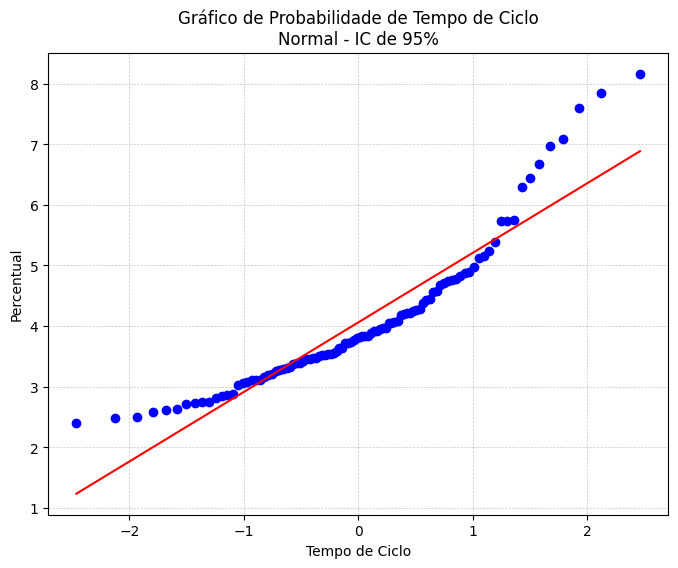

In [20]:
# Pegando os dados da coluna que queremos analisar
dados_para_analisar = dados_aba2['Tempo de Ciclo'].dropna() # O .dropna() tira qualquer "buraco" nos dados, se houver

# Gerando o gráfico de probabilidade
fig, ax = plt.subplots(figsize=(8, 6)) # Cria um "desenho" e um "local" para ele

stats.probplot(dados_para_analisar, dist="norm", plot=ax) # Essa é a mágica que faz o gráfico!

# Adicionando um título para nosso desenho
ax.set_title('Gráfico de Probabilidade de Tempo de Ciclo\nNormal - IC de 95%')
ax.set_xlabel('Tempo de Ciclo') # Rótulo da parte de baixo
ax.set_ylabel('Percentual') # Rótulo da lateral

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7) # Coloca umas grades para ajudar a ver
plt.show() # Mostra o desenho!

In [23]:
# Pegando os dados da coluna 'Quantidade produzida (kg)'
dados_quantidade = dados_aba2['Tempo de Ciclo'].dropna() # Para garantir que não tem buracos

# Pedindo o relatório rápido!
relatorio_quantidade = dados_quantidade.describe()

# Mostrando o relatório
print("--- Relatório Rápido para 'Tempo de Ciclo' ---")
print(relatorio_quantidade)

--- Relatório Rápido para 'Tempo de Ciclo' ---
count    100.000000
mean       4.058232
std        1.201850
min        2.393415
25%        3.279993
50%        3.809899
75%        4.562168
max        8.161455
Name: Tempo de Ciclo, dtype: float64


In [24]:
# Realizando o Teste de Shapiro-Wilk para Normalidade
estatistica_shapiro, p_valor_shapiro = stats.shapiro(dados_quantidade)

print(f"\n--- Teste de Normalidade (Shapiro-Wilk) ---")
print(f"Estatística do Teste (W): {estatistica_shapiro:.3f}") # Mostra 3 casinhas
print(f"P-valor: {p_valor_shapiro:.3f}") # Mostra 3 casinhas


--- Teste de Normalidade (Shapiro-Wilk) ---
Estatística do Teste (W): 0.884
P-valor: 0.000
